### Summary

<p>
This project applies the KNearest Ne"ttp://insideairbnb.comighbors algorithm to the AirBnB listings data set of the Washington, D.C. area provided by <a href="http://insideairbnb.com">InsideAirBnB]</a>. The algorithm is implemented with both core Python creating new functions and also <a href="https://scikit-learn.org">scikit-learn </a> functionality. The goal is to predict prices by a set of features.
</p>
<p>
The data set is cleaned and prepared in this project. Some variables here used as features are:
</p>

<ul>
<li>accommodates: the number of guests the rental can accommodate</li>
<li>room_type: the type of living space (Private room, Shared room or Entire home/apt</li>
<li>bedrooms: number of bedrooms included in the rental</li>
<li>bathrooms: number of bathrooms included in the rental</li>
<li>beds: number of beds included in the rental</li>
<li>price: nightly price for the rental</li>
<li>minimum_nights: minimum number of nights a guest can stay for the rental</li>
<li>maximum_nights: maximum number of nights a guest can stay for the rental</li>
<li>number_of_reviews: number of reviews that previous guests have left</li>
</ul>


###  Import basic packages

In [497]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt


In [498]:
washington_air_listings_imported = pd.read_csv('airbnb_listings.csv')
print(washington_air_listings_imported.shape)
print(washington_air_listings_imported.info(verbose=False))

(3723, 92)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Columns: 92 entries, id to reviews_per_month
dtypes: float64(16), int64(15), object(61)
memory usage: 2.6+ MB
None


In [499]:
columns_list = washington_air_listings_imported.columns
columns_list

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Reduce the number of variables and keeping only the necessary variables.

In [500]:
variables_used_in_analysis =   ["host_response_rate", "host_acceptance_rate", 
                                "host_listings_count"
                                "latitude",
                                "longitude",
                                "city",
                                "zipcode",
                                "state",
                                "accommodates",
                                "room_type",
                                "bedrooms",
                                "bathrooms",
                                "beds",
                                "price",
                                "cleaning_fee",
                                "security_deposit",
                                "minimum_nights",
                                "maximum_nights",
                                "number_of_reviews"]


In [501]:
washington_air_listings_reduced = washington_air_listings_imported.loc[:, variables_used_in_analysis]
washington_air_listings_reduced.shape

(3723, 18)

In [502]:
washington_air_listings_reduced.isnull().sum()

host_response_rate              434
host_acceptance_rate            614
host_listings_countlatitude    3723
longitude                         0
city                              0
zipcode                           9
state                             0
accommodates                      0
room_type                         0
bedrooms                         21
bathrooms                        27
beds                             11
price                             0
cleaning_fee                   1388
security_deposit               2297
minimum_nights                    0
maximum_nights                    0
number_of_reviews                 0
dtype: int64

Calculate the Euclidian distance between a given living space and the first accomodate observation in the data set.

In [503]:
washington_airbnb_1 = washington_air_listings_reduced.copy()

In [504]:
# my living space can accodomatge three guests
my_guests_1 = 3
first_distance_1 = np.abs(my_guests_1 - washington_airbnb_1.loc[0,'accommodates'])
print(first_distance_1)
# 3-4=-1
print(washington_airbnb_1.loc[0:3,'accommodates'])

1
0    4
1    6
2    1
3    2
Name: accommodates, dtype: int64


If values are the same then the Euclidian distance is 0. The similarity between point A and B is then perfect
with regard to the feature (accommodates).

In [505]:
my_guests_2 = 4
first_distance_2 = np.abs(my_guests_2 - washington_airbnb_1.loc[0,'accommodates'])
# 4-4=-0
print(first_distance_2)

0


In [506]:
washington_airbnb_1['distance'] = washington_airbnb_1['accommodates'].apply(lambda x: np.abs(3-x))
washington_airbnb_1['distance'].value_counts().sort_values(ascending=True)

10       2
11       4
12       6
8        7
13       8
9       12
6       17
7       22
4       35
5       73
3      279
0      461
2      503
1     2294
Name: distance, dtype: int64

One is the most frequent distance with 2294 and 10 is the least frequent distance with 2. 461 locations offer
space for 3 accomodates like in the given value.

### Cleaning data frame and randomize the index.

In [507]:
# randomize because otherwise the given order of the data frame would determine the first five values
random_series_1 = np.arange(0, len(washington_airbnb_1))

In [508]:
random_series_1_permutated = np.random.permutation(random_series_1 )


In [509]:
# washington_airbnb_1 = washington_airbnb_1.reindex(random_series_1_permutated )
washington_airbnb_1 = washington_airbnb_1.loc[np.random.permutation(len(washington_airbnb_1))]
washington_airbnb_1.sort_values('distance', inplace=True)
washington_airbnb_1.head(3)

,host_response_rate,host_acceptance_rate,host_listings_countlatitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,distance
2257,100%,100%,NaN,-76.998581,Washington,20002,DC,3,Entire home/apt,1.0,1.0,1.0,$129.00,NaN,NaN,2,1125,8,0
1208,100%,84%,NaN,-77.043029,Washington,20009,DC,3,Entire home/apt,0.0,1.0,2.0,$139.00,$75.00,$150.00,1,1125,1,0
224,100%,55%,NaN,-77.010526,"Washington, D.C.",20001,DC,3,Entire home/apt,1.0,1.0,2.0,$99.00,NaN,"$1,000.00",3,1125,4,0


In [510]:
washington_airbnb_1[['distance', 'accommodates','price']].head(10)

,distance,accommodates,price
2257,0,3,$129.00
1208,0,3,$139.00
224,0,3,$99.00
1729,0,3,$91.00
3506,0,3,$150.00
976,0,3,$95.00
3370,0,3,$139.00
1524,0,3,$60.00
394,0,3,$149.00
2830,0,3,$65.00


Price needs cleaning.

In [511]:
print(type(washington_airbnb_1.loc[5,'price']))
# print(len(washington_airbnb_1['price'].str.match("\.{0,9}")))

<class 'str'>


In [512]:
washington_airbnb_1['price'] = washington_airbnb_1['price'].str.replace("$","").str.replace(",","")

In [513]:
washington_airbnb_1['price'] = washington_airbnb_1['price'].astype(float)

In [514]:
washington_airbnb_1[['distance', 'accommodates','price']].head(10)

,distance,accommodates,price
2257,0,3,129.0
1208,0,3,139.0
224,0,3,99.0
1729,0,3,91.0
3506,0,3,150.0
976,0,3,95.0
3370,0,3,139.0
1524,0,3,60.0
394,0,3,149.0
2830,0,3,65.0


### As simple prediction model: the mean

### Using the mean price for prediction of price with accomodates of 3.

In [515]:
# The average calculated not only over the first five neighbours does not change.

price_mean_total = round(washington_airbnb_1.loc[washington_airbnb_1['accommodates']==3,'price'].mean(),2)
print(price_mean_total)

146.17


In [516]:
price_mean_total_0 = round(washington_airbnb_1.loc[washington_airbnb_1['distance']==0,'price'].mean(),2)
print(price_mean_total_0)

146.17


In [517]:
# selecting 5 nearest neighbours. Depending on permutation on the index the price will change.
price_mean_five_neighbours = round(washington_airbnb_1.loc[0:5,'price'].mean(),2)
print(price_mean_five_neighbours )

nan


### Using the mean price for prediction of price with accomodates of X


In [518]:
washington_airbnb_2 = washington_airbnb_1.drop('distance', axis=1)
# washington_airbnb_2.columns

In [519]:
# prediction based on 5 nearest neighbours

def predict_mean_price(number_of_accommodations):
    # make a new data frame avoiding reference conflicts
    new_df = washington_airbnb_2.copy()
    new_df['distance']=new_df['accommodates'].apply(lambda x: np.abs(x-number_of_accommodations))
    new_df=new_df.sort_values('distance')
    price_first_five_neighbours = new_df.iloc[0:5]['price']
    mean_price_first_five_neighbours = price_first_five_neighbours.mean()
    return (mean_price_first_five_neighbours)

In [520]:
accommodations_1 = predict_mean_price(1)
print(accommodations_1)
accommodations_2 = predict_mean_price(2)
print(accommodations_2)
accommodations_3 = predict_mean_price(3)
print(accommodations_3)
accommodations_4 = predict_mean_price(4)
print(accommodations_4)
accommodations_5 = predict_mean_price(5)
print(accommodations_5)

83.2
115.6
183.4
138.8
228.2


In [521]:
### The average calculated not only over the first five neighbours does not change.

def predict_mean_price_total(number_of_accommodations):
    # make a new data frame avoiding reference conflicts
    new_df = washington_airbnb_2.copy()
    new_df['distance']=new_df['accommodates'].apply(lambda x: np.abs(x-number_of_accommodations))
    new_df=new_df.sort_values('distance')
    
    mean_price_first_five_neighbours = round(new_df.loc[new_df['accommodates']==
                                                        number_of_accommodations,'price'].mean(), 2)
    return (mean_price_first_five_neighbours)

print(predict_mean_price_total(1))
print(predict_mean_price_total(4))
print(predict_mean_price_total(5))
print(predict_mean_price_total(10))

80.06
159.82
223.8
387.05


## Assessment Model Performance

In [522]:

washington_airbnb_3 = washington_airbnb_2.copy()
train_set_1 = washington_airbnb_3.sample(frac=0.75, random_state=0)
test_set_1 = washington_airbnb_3.drop(train_set_1.index, axis='index')
print(train_set_1.shape)
print(test_set_1.shape)


(2792, 18)
(931, 18)


In [523]:
train_set_2 = train_set_1.copy()
test_set_2 = test_set_1.copy()

train_set_3 = train_set_1.copy()
test_set_3 = test_set_1.copy()

train_set_4 = train_set_1.copy()
test_set_4 = test_set_1.copy()

In [524]:
# Modifying the function by creating new arguments
def predict_mean_price( number, df, variable):
    # make a new data frame avoiding reference conflicts
    new_df = df.copy()
    new_df['distance']=new_df[variable].apply(lambda x: np.abs(x-number))
    new_df=new_df.sort_values('distance')
    price_first_five_neighbours = new_df.iloc[0:5]['price']
    mean_price_first_five_neighbours = price_first_five_neighbours.mean()
    return (mean_price_first_five_neighbours)

Predicting mean price for every number of accommodates.

In [525]:
test_set_2['predicted_price'] =  test_set_2['accommodates'].apply(func=predict_mean_price, 
                                                                  args=(train_set_2,'accommodates'))

In [526]:
test_set_2[['accommodates', 'predicted_price']].head()

,accommodates,predicted_price
2257,3,104.6
1729,3,104.6
1524,3,104.6
1074,3,104.6
670,3,104.6


In [527]:
test_set_2[['accommodates', 'predicted_price']].tail(10)

,accommodates,predicted_price
3575,11,812.8
1624,11,812.8
3305,12,254.4
1656,12,254.4
808,12,254.4
1875,12,254.4
1658,14,499.4
1402,16,613.8
1596,16,613.8
763,16,613.8


#### Evaluating the predictions with the [mean absolute error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)

In [528]:
# based on accommodations
test_set_2['error'] = np.absolute(test_set_2['predicted_price'] - test_set_2['price'])
test_set_2['error'][0:5]

2257    24.4
1729    13.6
1524    44.6
1074    20.4
670     16.4
Name: error, dtype: float64

In [529]:
mae_1 = round(test_set_2['error'].mean(), 2)
mae_1

55.01

On average the predictions deviate with $ 61.85 from the given price.

In [530]:
test_set_2['squared_error'] = (test_set_2['predicted_price'] - test_set_2['price'])**2
test_set_2['squared_error'][0:5]

2257     595.36
1729     184.96
1524    1989.16
1074     416.16
670      268.96
Name: squared_error, dtype: float64

In [531]:
mse_1 = round(test_set_2['squared_error'].mean(),4)
mse_1

15029.1979

In [532]:
rmse_1 = np.sqrt(mse_1)
print(round(rmse_1,2))

122.59


The rmse brings back the unit of the raw data. In this case 185.21 in Dollar.

The mean square error makes the size of the error more visibile, but it is not very instructive as long
as it not compared with the error of other models. It is more a between evalution metric than a within.
Another model is created now based on the bathroom variable.

In [533]:
train_set_3 = train_set_3.dropna(axis=0, subset=['bathrooms'])
print(train_set_3['bathrooms'].isnull().sum())


0


In [534]:
train_set_45654 = train_set_3 [['bathrooms', 'price']]
train_set_45654.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2773 entries, 3086 to 1099
Data columns (total 2 columns):
bathrooms    2773 non-null float64
price        2773 non-null float64
dtypes: float64(2)
memory usage: 65.0 KB


In [535]:
test_set_3['predicted_price'] =  test_set_3['bathrooms'].apply(func=predict_mean_price, 
                                                               args=(train_set_3,'bathrooms'))

In [536]:
test_set_3[['bathrooms', 'predicted_price']].head()

,bathrooms,predicted_price
2257,1.0,121.6
1729,1.0,121.6
1524,1.0,121.6
1074,1.0,121.6
670,1.0,121.6


In [537]:
test_set_3['error'] = np.absolute(test_set_3['predicted_price'] - test_set_3['price'])
test_set_3['error'][0:5]

2257     7.4
1729    30.6
1524    61.6
1074     3.4
670      0.6
Name: error, dtype: float64

In [538]:
mae_2 = round(test_set_3['error'].mean(), 2)
mae_2

58.72

In [539]:
test_set_3['squared_error'] = (test_set_3['predicted_price'] - test_set_3['price'])**2
test_set_3['squared_error'][0:5]

2257      54.76
1729     936.36
1524    3794.56
1074      11.56
670        0.36
Name: squared_error, dtype: float64

In [540]:
mse_2 = round(test_set_3['squared_error'].mean(),4)
mse_2

13556.0934

In [541]:
rmse_2 = np.sqrt(mse_2)
print(round(rmse_2, 2))
print(type(rmse_2))

116.43
<class 'numpy.float64'>


<p>
The rmse brings back the unit of the raw data. In this case 105.89 in Dollar. This means: on average 
the predictions divert from the given prices by 105.89 Dollars.
</p>

<p>
Comparing the bathroom-rmse Dollar 105.89 and the accommodates rmse Dollar 185.21 of the bathroom model makes better
predictions.
</p>
<p>
But: Is this a satisfactory prediction? Or should the predictions made better?
</p>

In [542]:
max_2 = test_set_1['price'].max()
print(test_set_1['price'].max())
min_2 = test_set_1['price'].min()
print(test_set_1['price'].min())
range_2 = max_2 - min_2
print(range_2)

2000.0
23.0
1977.0


C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


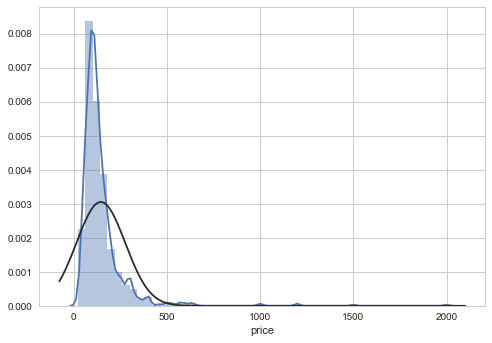

In [543]:

sns.set(style="whitegrid")
ax = sns.distplot(test_set_1['price'],fit=norm)


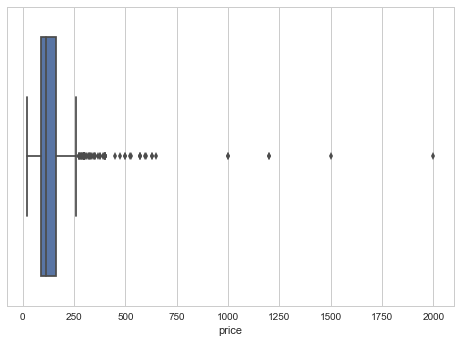

In [544]:
ax=sns.boxplot(test_set_1['price'])

The prices from 250 to 2000 are outliers. Besides this the values are concentrated on the left side
from ca. 10 to ca. 250. A prediction error of  105.89 is not very good in this range.
The prediction error (RMSE) should therefore be decreased with better prediction techniques.

### Improving predictions
Options are increasing number of features used for predictions or increasing number of neighbours. <br>
(Or using other models / algorithms)

In [545]:
washington_airbnb_3=washington_airbnb_2.copy()

In [546]:
washington_airbnb_3.info()
# host_listings_countlatitude seems not tidy - do not need here anyway

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 2257 to 1224
Data columns (total 18 columns):
host_response_rate             3289 non-null object
host_acceptance_rate           3109 non-null object
host_listings_countlatitude    0 non-null float64
longitude                      3723 non-null float64
city                           3723 non-null object
zipcode                        3714 non-null object
state                          3723 non-null object
accommodates                   3723 non-null int64
room_type                      3723 non-null object
bedrooms                       3702 non-null float64
bathrooms                      3696 non-null float64
beds                           3712 non-null float64
price                          3723 non-null float64
cleaning_fee                   2335 non-null object
security_deposit               1426 non-null object
minimum_nights                 3723 non-null int64
maximum_nights                 3723 non-null int64
number

Removing columns with non-numerical, non-ordinal and host rating variables.

In [547]:
variables_drop =   ["room_type",
                    "city",
                    "state",
                    "longitude",
                    "host_listings_countlatitude",
                    "zipcode",
                    "host_response_rate",
                    "host_acceptance_rate"]
washington_airbnb_3.drop(labels=variables_drop, axis=1, inplace=True)

washington_airbnb_3.columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews'],
      dtype='object')

In [548]:
print(washington_airbnb_3.shape)
print(washington_airbnb_3.isnull().sum())

(3723, 10)
accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


In [549]:
number_observations = washington_airbnb_3.shape[0]
percentage_missing_values = round((washington_airbnb_3.isnull().sum()/number_observations)*100,2)
percentage_missing_values 

accommodates          0.00
bedrooms              0.56
bathrooms             0.73
beds                  0.30
price                 0.00
cleaning_fee         37.28
security_deposit     61.70
minimum_nights        0.00
maximum_nights        0.00
number_of_reviews     0.00
dtype: float64

Bedrooms, beds and bathrooms have low percentage of missing values. These observations can be dropped without 
damage the data set. The cleaning_fee and security_deposit have substantial missing values.
Dropping all observations containing these missing values entirely would harm the quality of the data set.
Instead dropping the columns are dropped.

In [550]:
drop_two_cols = ["cleaning_fee" , "security_deposit"]

washington_airbnb_3.drop(labels=drop_two_cols, axis=1, inplace=True)
washington_airbnb_3.dropna(axis=0, inplace=True, how='any')

washington_airbnb_3.isnull().sum()

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64

Missing values are not given any longer.

In [551]:
range_values_washington_airbnb_3 = {}
col_list_1 = list(washington_airbnb_3.columns)
range_list_1 = range(0,len(washington_airbnb_3.columns))
for i, n in zip(range_list_1, col_list_1):
    range_min_max =  washington_airbnb_3.iloc[:,i].max() - washington_airbnb_3.iloc[:,i].min()
    range_values_washington_airbnb_3[n] = range_min_max

print(range_values_washington_airbnb_3)

{'accommodates': 15, 'bedrooms': 10.0, 'bathrooms': 8.0, 'beds': 15.0, 'price': 2812.0, 'minimum_nights': 179, 'maximum_nights': 2147483646, 'number_of_reviews': 362}


In [677]:
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
# for e in range(1, 9):
        # fig = plt.figure()  
        # ax = fig.add_subplot(2, 4, e)
        # for i,col in enumerate(washington_airbnb_3.columns):
            # ax.boxplot(washington_airbnb_3[col])




Minimum and maximum nights have one outlier. The range of 2147483646 in maximum nights is a mistake obviously.

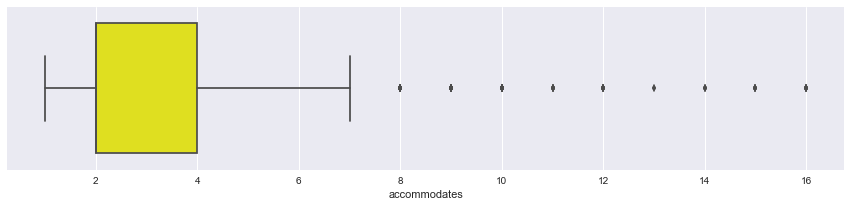

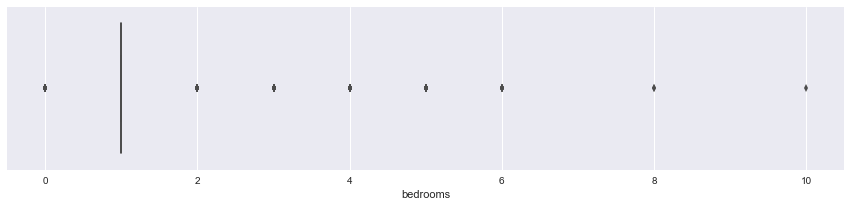

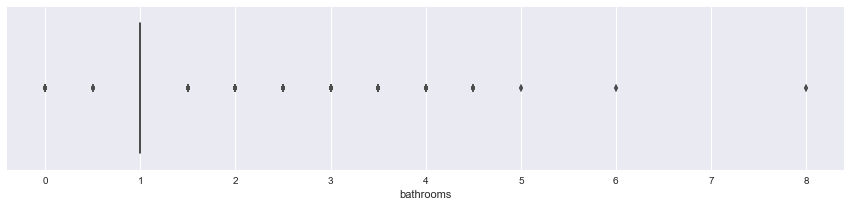

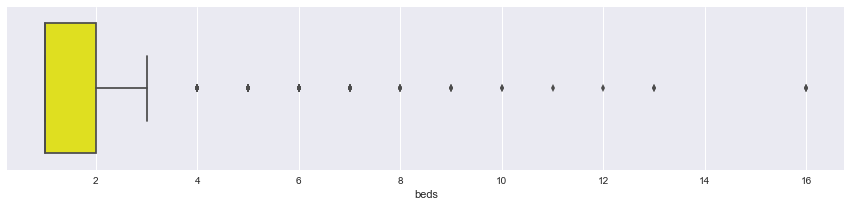

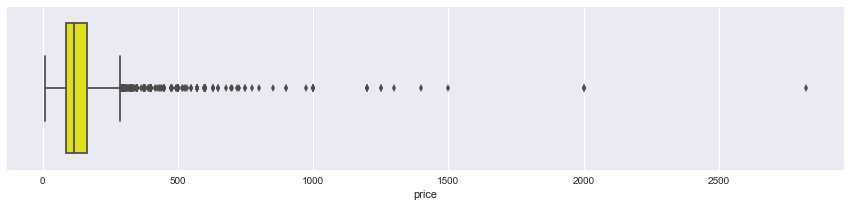

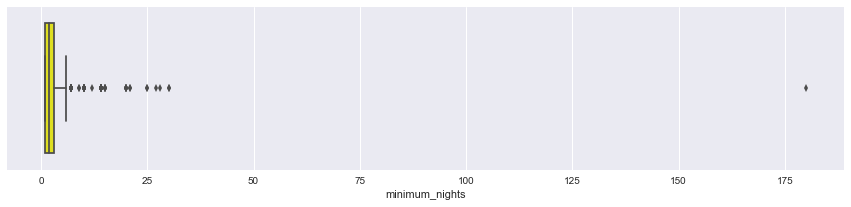

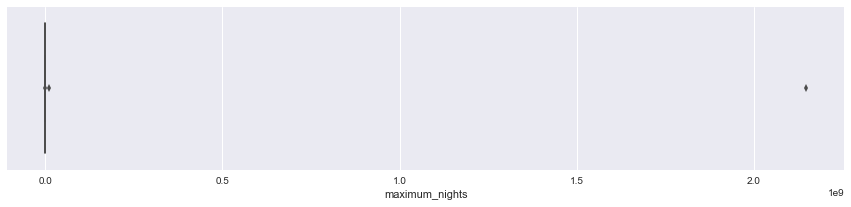

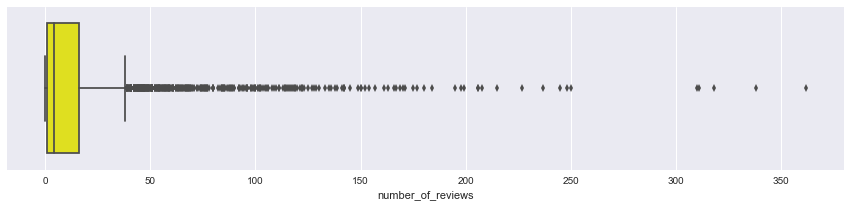

In [553]:
sns.set(rc={'figure.figsize':(15,3)})
for i, col in enumerate(washington_airbnb_3.columns):
    plt.figure(i)    
    # sns.set(rc={'figure.figsize':(15,3)})
    sns.boxplot(x=col, data=washington_airbnb_3, color='yellow')

In [554]:
airbnb_1 = washington_airbnb_3.copy()

In [555]:
condition_1 = airbnb_1['maximum_nights']==airbnb_1['maximum_nights'].max()
airbnb_1[condition_1]

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
3720,6,2.0,1.0,3.0,275.0,2,2147483647,12


In [556]:
condition_2 = airbnb_1['maximum_nights']!=airbnb_1['maximum_nights'].max()
airbnb_1 = airbnb_1[condition_2]

In [557]:
airbnb_1[airbnb_1['maximum_nights']==airbnb_1['maximum_nights'].max()]

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
391,6,2.0,2.0,2.0,188.0,1,9999999,3


It seems there are additional implausible maximum nights values. Actually a stay longer than 30 days maybe
possible, while in a legal grey area. However maximum nights at least longer than 1000 
are probably false entries. These are here replaced with a maximum night of 100 using pandas slicing methods.

In [558]:
condition_3 = airbnb_1['maximum_nights']>1000
print(airbnb_1[condition_3].head())
print(airbnb_1.loc[condition_3, 'maximum_nights'].count())

      accommodates  bedrooms  bathrooms  beds  price  minimum_nights  \
2257             3       1.0        1.0   1.0  129.0               2   
1208             3       0.0        1.0   2.0  139.0               1   
224              3       1.0        1.0   2.0   99.0               3   
1729             3       1.0        1.0   2.0   91.0               4   
1524             3       1.0        1.0   2.0   60.0               2   

      maximum_nights  number_of_reviews  
2257            1125                  8  
1208            1125                  1  
224             1125                  4  
1729            1125                  0  
1524            1125                  0  
2398


In [559]:
airbnb_2 = airbnb_1.copy()
condition_4 = airbnb_2['maximum_nights']>1000
airbnb_2.loc[condition_4, 'maximum_nights'] = 100

In [560]:
# airbnb_2['maximum_nights']>1000

In [561]:
airbnb_2[airbnb_2['maximum_nights']==100].head(2)
print(airbnb_2.loc[airbnb_2['maximum_nights']==100, 'maximum_nights'].count())

2407


In [562]:
round(airbnb_2.aggregate(func=['mean', 'max', 'min','std']), 2)

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
mean,3.19,1.21,1.26,1.65,148.81,2.24,111.04,15.11
max,16.00,10.00,8.00,16.00,2822.00,180.00,1000.00,362.00
min,1.00,0.00,0.00,1.00,10.00,1.00,1.00,0.00
std,2.00,0.84,0.59,1.18,137.55,3.62,121.81,29.24


Even after cleaning the distance of the values in the different columns are spread out.
For this reason the variables are now transformed by
[normalization](https://en.wikipedia.org/wiki/Normalization_(statistics)) diminshing 
the impact of the variables greater in size.

In [563]:
airbnb_3 = airbnb_2.copy()

airbnb_3_normalized = (airbnb_3 - airbnb_3.mean()) /airbnb_3.std()
airbnb_3_normalized['price'] = airbnb_2['price']
airbnb_3_normalized.aggregate(['mean', 'max' , 'min', 'std'])

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
mean,7.323721e-15,4.929254e-15,-3.780930e-15,3.234470e-15,148.809264,-4.376759e-16,-2.297610e-15,6.455629e-17
max,6.390039e+00,1.045471e+01,1.148851e+01,1.211701e+01,2822.000000,4.911617e+01,7.298044e+00,1.186342e+01
min,-1.095260e+00,-1.438531e+00,-2.143184e+00,-5.465696e-01,10.000000,-3.413459e-01,-9.034197e-01,-5.166679e-01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,137.553017,1.000000e+00,1.000000e+00,1.000000e+00


In [564]:
airbnb_3_normalized.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
2257,-0.097221,-0.249207,-0.439223,-0.546570,129.0,-0.065047,-0.090662,-0.243075
1208,-0.097221,-1.438531,-0.439223,0.297669,139.0,-0.341346,-0.090662,-0.482469
224,-0.097221,-0.249207,-0.439223,0.297669,99.0,0.211252,-0.090662,-0.379871
1729,-0.097221,-0.249207,-0.439223,0.297669,91.0,0.487551,-0.090662,-0.516668
976,-0.097221,-0.249207,-0.439223,-0.546570,95.0,-0.065047,-0.090662,-0.003681


In [565]:
print(type(airbnb_3_normalized))
print(airbnb_3_normalized.shape)

<class 'pandas.core.frame.DataFrame'>
(3670, 8)


In [566]:
# Should I keep the index?
airbnb_3_normalized.loc[airbnb_3_normalized['accommodates']== (-0.097221), 'accommodates']

Series([], Name: accommodates, dtype: float64)

In [567]:
airbnb_3_normalized['accommodates'].unique()

array([-0.09722051,  0.40179945, -0.59624047, -1.09526044,  0.90081942,
        1.39983938,  1.89885934,  2.39787931,  2.89689927,  3.39591924,
        3.8949392 ,  4.39395916,  4.89297913,  5.39199909,  5.89101906,
        6.39003902])

In [568]:
airbnb_3_normalized['accommodates'].value_counts()

-0.596240    1578
 0.401799     680
-0.097221     457
-1.095260     336
 1.399839     275
 0.900819     161
 2.397879      73
 1.898859      35
 3.395919      22
 2.896899      17
 4.393959       9
 6.390039       8
 3.894939       7
 5.891019       6
 5.391999       4
 4.892979       2
Name: accommodates, dtype: int64

In [569]:
airbnb_2['accommodates'].value_counts()

2     1578
4      680
3      457
1      336
6      275
5      161
8       73
7       35
10      22
9       17
12       9
16       8
11       7
15       6
14       4
13       2
Name: accommodates, dtype: int64

In [570]:
airbnb_2.loc[airbnb_2['accommodates']==2, 'accommodates'].head()

3300    2
2759    2
939     2
1993    2
2941    2
Name: accommodates, dtype: int64

In [571]:
airbnb_2.loc[airbnb_2['accommodates']==6, 'accommodates'].head()

3223    6
3650    6
3541    6
2035    6
2302    6
Name: accommodates, dtype: int64

Calculating Eucledian distances using scipy.

In [572]:
observation_1 = airbnb_3_normalized.loc[1334 ][['bedrooms', 'accommodates' ]]
observation_2 = airbnb_3_normalized.loc[3167][['bedrooms', 'accommodates' ]]
print(observation_1)
print(observation_2)

bedrooms       -0.249207
accommodates   -0.596240
Name: 1334, dtype: float64
bedrooms        2.129440
accommodates    1.399839
Name: 3167, dtype: float64


In [573]:
from scipy.spatial import distance

distance.euclidean(observation_1, observation_2)

3.1052050097758346

Now the [scikit-learn](https://scikit-learn.org/stable/) workflow is used by:

<ul>
<li>instantiate the knn machine learning model</li>
<li>fit the model to the training data</li>
<li>make predictions</li>
<li>evaluate the accuracy of the predictions</li>
</ul>



Make train and test data sets.

In [574]:
train_set_1_normal = airbnb_3_normalized.sample(frac=0.75, random_state=0)
print(train_set_1_normal.shape)

print(train_set_1_normal.index[0:5])
print(len(train_set_1_normal))
train_set_1_normal_index = train_set_1_normal.index

(2752, 8)
Int64Index([2784, 1158, 2640, 2364, 765], dtype='int64')
2752


In [575]:
test_set_1_normal = airbnb_3_normalized.drop(train_set_1_normal_index , axis='index')
print(test_set_1_normal.shape)

(918, 8)


In [576]:
train_set_2_normal = train_set_1_normal.copy()
test_set_2_normal = test_set_1_normal.copy()

Extracting features, predictors, explanatory, independent variables selected from the training data set.

In [577]:
training_features_2 = train_set_2_normal[['accommodates', 'bathrooms', 'bedrooms']]
print(training_features_2.shape)


(2752, 3)


Extracting target, response, dependent variable.

In [578]:
training_target_2 = train_set_2_normal['price']
print(training_target_2.shape)

(2752,)


 Instantiating a knn model using regression as the target price variable is a continuous numerical variable.

In [579]:
from sklearn.neighbors import KNeighborsRegressor 
knn_model_3_features = KNeighborsRegressor(algorithm='brute', n_neighbors = 5)
print(knn_model_3_features)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


Fit the model to training data.

In [580]:
knn_model_3_features.fit(train_set_1_normal[['accommodates', 'bathrooms', 'bedrooms']], train_set_1_normal['price'])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

Make predictions.

In [581]:
predictions_1 = knn_model_3_features.predict(test_set_1_normal[['accommodates', 'bathrooms', 'bedrooms']])
print(predictions_1.shape)
print(predictions_1[0:10])

(918,)
[ 144.8  144.8  144.8  144.8  144.8  196.   144.8  144.8  144.8  149.8]


Evaluating the quality of predictions using mean squared error from sklearn.metrics.

In [582]:
from sklearn.metrics import mean_squared_error

mse_model_3 = mean_squared_error(test_set_1_normal['price'], predictions_1)
rmse_model_3 = np.sqrt(mse_1)

print("Mean Squared Error (mse): {}".format(round(mse_model_3, 4)))
print("Root Mean Squared Error (rmse): {}".format(round(rmse_model_3, 4)))



Mean Squared Error (mse): 10116.6172
Root Mean Squared Error (rmse): 122.5936


In [583]:
print("Mean Squared Error (mse) - model 2: {}".format(round(mse_2, 4)))
print("Root Mean Squared Error (mse) - model 2: {}".format(round(rmse_2, 4)))


Mean Squared Error (mse) - model 2: 13556.0934
Root Mean Squared Error (mse) - model 2: 116.4306


The new model combining three features within sklearn workflow has improved the the rmse from 147.7282 Dollar to
104.4553 Dollar. This can further be improved.

<b>Feature selection</b><br>
Increasing the number of features used for predictions.

In [584]:
train_set_1_normal.columns

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews'],
      dtype='object')

In [585]:
features_4 = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']

In [586]:
knn_model_4_features = KNeighborsRegressor(algorithm='brute', n_neighbors=5)
knn_model_4_features

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [587]:
knn_model_4_features.fit(train_set_1_normal[features_4], train_set_1_normal['price'])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [588]:
predictions_4 = knn_model_4_features.predict(test_set_1_normal[features_4])
print(predictions_4.shape)
print(predictions_4[0:10])

(918,)
[ 122.6  180.8   96.8  131.4  122.2  197.6  107.2  180.8  117.8  108.8]


In [589]:
# mean_squared_error(y_true, y_pred)
mse_4 = mean_squared_error(test_set_1_normal['price'], predictions_4)
print("Mean Squared Error with 4 features: {}".format(round(mse_4, 4)))
rmse_4 = np.sqrt(mse_4)
print("Root Mean Squared Error with 4 features: {}".format(round(rmse_4, 2)))

Mean Squared Error with 4 features: 12875.4617
Root Mean Squared Error with 4 features: 113.47


Using 4 features did not produce a better RMSE. More features will not necessarily produce better results.

Make a model with all features.

In [590]:
features_all = list(train_set_1_normal.columns)
features_all

['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [591]:
features_all.remove('price')
features_all

['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [592]:
# Initiating the model
knn_model_all_features = KNeighborsRegressor(algorithm = 'brute', n_neighbors=5)
# Fit the model to the training data
knn_model_all_features.fit(train_set_1_normal[features_all], train_set_1_normal['price'])

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [593]:
# Predictions
predictions_all  = knn_model_all_features.predict(test_set_1_normal[features_all])
print(predictions_all.shape)
print(predictions_all[200:205])

(918,)
[ 119.4  114.8  109.4  200.   109. ]


In [594]:
# Evaluate
# mean_squared_error(y_true, y_pred)
mse_all = mean_squared_error(test_set_1_normal['price'], predictions_all)
print("Mean Squared Error using all features: {}".format(round(mse_all, 4)))
rmse_all = mse_all ** (1/2)
print("Root Mean Squared Error using all features: {}".format(round(rmse_all,4)))

Mean Squared Error using all features: 9992.008
Root Mean Squared Error using all features: 99.96


Trying out 7 features

In [595]:
features_7 =['accommodates',
             'bedrooms',
             'bathrooms',
             'beds',
             'price',
             'minimum_nights',
             'maximum_nights',]

In [596]:
# Initiating the model
knn_model_7_features = KNeighborsRegressor(algorithm = 'brute', n_neighbors=5)
# Fit the model to the training data
knn_model_7_features.fit(train_set_1_normal[features_7], train_set_1_normal['price'])
# Predictions
predictions_7 = knn_model_7_features.predict(test_set_1_normal[features_7])
print(predictions_7.shape)
print(predictions_7[200:205])
# Evaluate
# mean_squared_error(y_true, y_pred)
mse_7 = mean_squared_error(test_set_1_normal['price'], predictions_7)
print("Mean Squared Error using all features: {}".format(round(mse_7, 4)))
rmse_7 = mse_all ** (1/2)
print("Root Mean Squared Error using all features: {}".format(round(rmse_7,4)))

(918,)
[ 100.  145.  120.  200.  100.]
Mean Squared Error using all features: 53.3673
Root Mean Squared Error using all features: 99.96


<b>Model selection based on the RMSE.</b><br>
The model using all features brought the predictions slightly down compared to using 3 features.<br>
As the RMSE is the decision criterion the model using all (or 7) features is selected for making predictions.


### Improving model quality by tuning the number of neighbours parameter k.

<p>
The model with all features is now implemented with different values of k and the quality of predictions evaluated.
</p>

Implementing with 5 different values of k.

In [597]:
hyperparameter_value_k_1 = np.arange(1,6,1)
rmse_values_1 = {}

for z,i in enumerate(hyperparameter_value_k_1):
    z = z + 1
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=i)
    knn.fit(train_set_1_normal[features_all], train_set_1_normal['price'])
    predictions = knn.predict(test_set_1_normal[features_all])
    mse = mean_squared_error(test_set_1_normal['price'], predictions)
    rmse = np.sqrt(mse)
    rmse = np.around(rmse,4)
    rmse_values_1[z] = rmse
    
print(rmse_values_1)

{1: 180.00880000000001, 2: 127.6696, 3: 111.0654, 4: 104.5384, 5: 99.959999999999994}


In [598]:
hyperparameter_value_k_2 = np.arange(1,21,1)
rmse_values_2 = {}

for z,i in enumerate(hyperparameter_value_k_2):
    z = z + 1
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=i)
    knn.fit(train_set_1_normal[features_all], train_set_1_normal['price'])
    predictions = knn.predict(test_set_1_normal[features_all])
    mse = mean_squared_error(test_set_1_normal['price'], predictions)
    rmse = np.sqrt(mse)
    rmse = np.around(rmse,4)
    rmse_values_2[z] = rmse
    
print(rmse_values_2)

{1: 180.00880000000001, 2: 127.6696, 3: 111.0654, 4: 104.5384, 5: 99.959999999999994, 6: 97.1798, 7: 95.761700000000005, 8: 94.813400000000001, 9: 95.315600000000003, 10: 95.328900000000004, 11: 95.320700000000002, 12: 95.778499999999994, 13: 95.170100000000005, 14: 95.060299999999998, 15: 94.744200000000006, 16: 94.006600000000006, 17: 93.948800000000006, 18: 93.385800000000003, 19: 92.685500000000005, 20: 92.957499999999996}


In [599]:
rmse_values_2_df = pd.DataFrame.from_dict(rmse_values_2, orient='index').sort_values(by=[0], ascending=True)
rmse_values_2_df.rename(index=str, columns={0: "RMSE"}, inplace=True)
rmse_values_2_df

,RMSE
19,92.6855
20,92.9575
18,93.3858
17,93.9488
16,94.0066
15,94.7442
8,94.8134
14,95.0603
13,95.1701
9,95.3156


A hyperparameter of k = 16 delivers the best RMSE of 103.3761.

In [600]:
rmse_values_3_df = pd.DataFrame.from_dict(rmse_values_2, orient='index').sort_index(ascending=True)
rmse_values_3_df.rename(index=str, columns={0: "RMSE"}, inplace=True)
rmse_values_3_df_index = list(rmse_values_3_df.index)

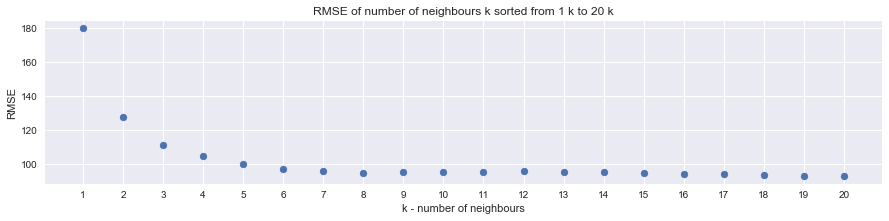

In [601]:
plt.scatter(x=rmse_values_3_df_index  , y=rmse_values_3_df.iloc[:,0])
plt.xlabel("k - number of neighbours")
plt.ylabel('RMSE')
plt.title("RMSE of number of neighbours k sorted from 1 k to 20 k")
plt.show()

The RMSE jumps down from 1 to 2 neighbours and then increases. This is a expected pattern. 
It decreases then again slightly.

In [602]:
# features_4 = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyperparameter_value_k_2 = np.arange(1,21,1)
rmse_values_5 = []

for i in hyperparameter_value_k_2:
    
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=i)
    knn.fit(train_set_1_normal[features_4], train_set_1_normal['price'])
    predictions = knn.predict(test_set_1_normal[features_4])
    mse = mean_squared_error(test_set_1_normal['price'], predictions)
    rmse = np.sqrt(mse)
    rmse = np.around(rmse,4)
    rmse_values_5.append(rmse)
    
print(rmse_values_5)

[174.84790000000001, 127.63939999999999, 111.6896, 123.6704, 113.4701, 107.9915, 104.3227, 102.7833, 100.75709999999999, 98.942899999999995, 97.203199999999995, 95.884100000000004, 95.886499999999998, 95.001000000000005, 95.647800000000004, 95.330500000000001, 94.682699999999997, 94.087900000000005, 93.069199999999995, 92.891400000000004]


The model with four features and 18 k produces with 101.1692 a better result.


In [603]:
print(hyperparameter_value_k_2)
print(rmse_values_5)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[174.84790000000001, 127.63939999999999, 111.6896, 123.6704, 113.4701, 107.9915, 104.3227, 102.7833, 100.75709999999999, 98.942899999999995, 97.203199999999995, 95.884100000000004, 95.886499999999998, 95.001000000000005, 95.647800000000004, 95.330500000000001, 94.682699999999997, 94.087900000000005, 93.069199999999995, 92.891400000000004]


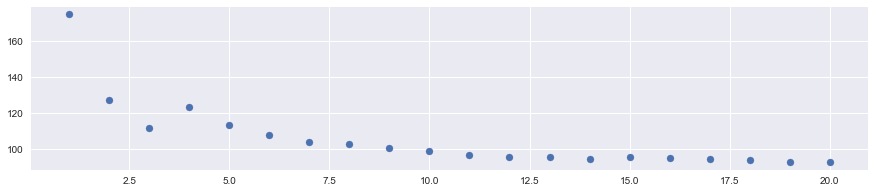

In [604]:
plt.scatter(x=hyperparameter_value_k_2, y=rmse_values_5 )
plt.show()

Determining minimum value of the k parameter with loop.

In [605]:
two_features = ['accommodates', 'bathrooms']
hyper_params = [x for x in range(1,21)]


all_mse = {}


Determining the elements of the for loop.

In [606]:
# Make a dictionary of all mse values = all_mse
for i, v in enumerate(hyper_params):
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=v)
    knn.fit(train_set_1_normal[two_features], train_set_1_normal['price'])
    predictions = knn.predict(test_set_1_normal[two_features])
    mse = mean_squared_error(test_set_1_normal['price'], predictions)
    all_mse[i] = mse

In [607]:
print(all_mse)

{0: 19586.898692810457, 1: 11691.75462962963, 2: 13250.087388041638, 3: 11539.586941721132, 4: 10941.144357298474, 5: 9994.3364197530864, 6: 10022.596683117694, 7: 9652.9458741830058, 8: 9412.4284945802774, 9: 9134.070305010895, 10: 9017.3944795549087, 11: 8878.2415728637134, 12: 8878.8749339314945, 13: 8703.1936107776437, 14: 9176.2817574437177, 15: 9057.5812142565355, 16: 9350.6868813653891, 17: 9207.7120820893524, 18: 9144.7302458071572, 19: 8913.5960375816994}


In [608]:
print(all_mse.items())

dict_items([(0, 19586.898692810457), (1, 11691.75462962963), (2, 13250.087388041638), (3, 11539.586941721132), (4, 10941.144357298474), (5, 9994.3364197530864), (6, 10022.596683117694), (7, 9652.9458741830058), (8, 9412.4284945802774), (9, 9134.070305010895), (10, 9017.3944795549087), (11, 8878.2415728637134), (12, 8878.8749339314945), (13, 8703.1936107776437), (14, 9176.2817574437177), (15, 9057.5812142565355), (16, 9350.6868813653891), (17, 9207.7120820893524), (18, 9144.7302458071572), (19, 8913.5960375816994)])


In [609]:
print(all_mse.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])


Maximum and minimum values.

In [610]:
maximum = max(all_mse.values())
maximum

19586.898692810457

In [611]:
minimum = min(all_mse.values())
minimum

8703.1936107776437

In [612]:
# search dict for maximum v and store the result into a dict
two_hyp_mse_222 = dict()

for k,v in all_mse.items():
    if v == maximum:
        two_hyp_mse_222[k] = v
        
        
print(two_hyp_mse_222)

{0: 19586.898692810457}


Instead of a for loop using a dict comprehension.

In [613]:
maximum_k_v = {(k,v) for k,v in all_mse.items() if v == maximum}
maximum_k_v

{(0, 19586.898692810457)}

In [614]:
minimum_k_v = {(k,v) for k,v in all_mse.items() if v == minimum}
minimum_k_v

{(13, 8703.1936107776437)}

Combine all elements into one loop determining the minimum and maximum by k.

In [615]:

two_hyp_mse_min = dict()
two_hyp_mse_max = dict()
all_mse_33 ={}
  

for i,v in enumerate(hyper_params):
    
    
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=v)
    knn.fit(train_set_1_normal[two_features], train_set_1_normal['price'])
    predictions = knn.predict(test_set_1_normal[two_features])
    mse = mean_squared_error(test_set_1_normal['price'], predictions)
    all_mse_33[i] = mse
    two_hyp_mse_min = {(k,v) for k,v in all_mse_33.items() if v == min(all_mse_33.values())}
    two_hyp_mse_max =  {(k,v) for k,v in all_mse_33.items() if v == max(all_mse_33.values())}
   

In [616]:
two_hyp_mse_min

{(13, 8703.1936107776437)}

In [617]:
two_hyp_mse_max

{(0, 19586.898692810457)}

In [618]:
rmse_two_454 = round(np.sqrt(list(list(two_hyp_mse_min)[0])[1]),2)
rmse_two_454

93.290000000000006

Doing similar with three features.

In [619]:
three_features = ['accommodates', 'bathrooms', 'bedrooms']

three_hyp_mse_min = dict()
three_hyp_mse_max = dict()
all_mse_555 ={}
  

In [620]:
for i,v in enumerate(hyper_params):
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=v)
    knn.fit(train_set_1_normal[three_features], train_set_1_normal['price'])
    predictions = knn.predict(test_set_1_normal[three_features])
    mse = mean_squared_error(test_set_1_normal['price'], predictions)
    all_mse_555[i] = mse
    three_hyp_mse_min = {(k,v) for k,v in all_mse_555.items() if v == min(all_mse_555.values())}
    three_hyp_mse_max = {(k,v) for k,v in all_mse_555.items() if v == max(all_mse_555.values())}
    

In [621]:
three_hyp_mse_min

{(8, 9074.7662390058922)}

In [622]:
print(type(three_hyp_mse_min))
g = list(three_hyp_mse_min)
t = list(g[0])
print(type(g))
print(type(g[0]))
print(type(t))
print(type(t[0]))
rmse_min_34534 = np.sqrt(t[1])
print("RMSE: {}".format(round(rmse_min_34534,4)))

<class 'set'>
<class 'list'>
<class 'tuple'>
<class 'list'>
<class 'int'>
RMSE: 95.2616


In [623]:
three_hyp_mse_max

{(0, 36681.738562091501)}

In [624]:
rmse_max_34534 = round(np.sqrt(list(list(three_hyp_mse_max)[0])[1]),4)
rmse_max_34534 

191.5248

The RMSE of 92.742 Dollar with k = 8 neighbours produced by a model with 
three_features = ['accommodates', 'bathrooms', 'bedrooms'] is the lowest RMSE (at this point) of the project.

### Cross Validation

Holdout validation techniques with two partitions on a 50/50 split.

In [625]:
# Start over with the data set at point washington_airbnb_1
washington_airbnb_7777 = washington_airbnb_1.copy()
washington_airbnb_7777.reset_index(inplace=True)
washington_airbnb_7777.index

RangeIndex(start=0, stop=3723, step=1)

In [626]:
washington_airbnb_7777_index = washington_airbnb_7777.index
washington_airbnb_7777_index

RangeIndex(start=0, stop=3723, step=1)

In [627]:
washington_airbnb_7777_index_permutated = np.random.permutation(washington_airbnb_7777_index)
washington_airbnb_7777_index_permutated

array([ 694, 2481, 1293, ..., 2660, 1132, 1185], dtype=int64)

In [628]:
washington_airbnb_7777 = washington_airbnb_7777.reindex(washington_airbnb_7777_index_permutated)
washington_airbnb_7777.index

Int64Index([ 694, 2481, 1293, 2645, 2230,  498,  985,   41, 1943,  729,
            ...
            1950, 3029, 2425, 1253, 2328,  749, 3413, 2660, 1132, 1185],
           dtype='int64', length=3723)

In [629]:
split_at_1 = int(round( len(washington_airbnb_7777) / 2,0))
split_at_1 

1862

In [630]:
partition_1 = washington_airbnb_7777.iloc[0:split_at_1, :]
partition_1.shape

(1862, 20)

In [631]:
partition_2 = washington_airbnb_7777.iloc[split_at_1: , :]
partition_2.shape

(1861, 20)

In [632]:
training_1 = partition_1.iloc[:int(len(partition_1)/2), :]
testing_1 = partition_1.iloc[int(len(partition_1)/2): , :]


print(training_1.shape)
print(testing_1.shape)



(931, 20)
(931, 20)


In [633]:
training_2 = partition_2.iloc[:931, :]
testing_2 = partition_2.iloc[int(len(partition_2)/2): , :]

print(training_2.shape)
print(testing_2.shape)

(931, 20)
(931, 20)


In [634]:
training_1.columns

Index(['index', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_countlatitude', 'longitude', 'city', 'zipcode', 'state',
       'accommodates', 'room_type', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'distance'],
      dtype='object')

In [635]:
training_1['accommodates'][0:5]

694     2
2481    4
1293    2
2645    2
2230    2
Name: accommodates, dtype: int64

In [636]:
print(training_1['accommodates'].shape)
print(training_1[['accommodates']].shape)

(931,)
(931, 1)


In [637]:
knn = KNeighborsRegressor(algorithm='auto' , n_neighbors=5)
knn.fit(training_1[['accommodates']], training_1['price'])
predictions = knn.predict(testing_1[['accommodates']])
mse_one_223 = mean_squared_error(testing_1['price'] , predictions)
rmse_one_223 = np.sqrt(mse_one_223)
print(rmse_one_223)

131.020399851


In [638]:
knn = KNeighborsRegressor(algorithm='auto' , n_neighbors=5)
knn.fit(training_2[['accommodates']], training_2['price'])
predictions = knn.predict(testing_2[['accommodates']])
mse_two_223 = mean_squared_error(testing_2['price'] , predictions)
rmse_two_223 = np.sqrt(mse_two_223)
print(rmse_two_223)

137.206204355


In [639]:
average_rmse = np.mean([rmse_one_223, rmse_two_223])
average_rmse

134.11330210307034

#### Constructing a k-fold cross-validation manually not using sklearn.

In [640]:
# The index is not sequential but shuffled
washington_airbnb_7777.index

Int64Index([ 694, 2481, 1293, 2645, 2230,  498,  985,   41, 1943,  729,
            ...
            1950, 3029, 2425, 1253, 2328,  749, 3413, 2660, 1132, 1185],
           dtype='int64', length=3723)

In [641]:
washington_airbnb_7777['fold'] = 0
washington_airbnb_7777.loc[washington_airbnb_7777.index[0:745], 'fold'] = 1
washington_airbnb_7777.loc[washington_airbnb_7777.index[745:1490], 'fold'] = 2
washington_airbnb_7777.loc[washington_airbnb_7777.index[1490:2234], 'fold'] = 3
washington_airbnb_7777.loc[washington_airbnb_7777.index[2234:2978], 'fold'] = 4
washington_airbnb_7777.loc[washington_airbnb_7777.index[2978:3723], 'fold'] = 5


In [642]:
washington_airbnb_7777['fold'].value_counts()

5    745
1    745
2    745
3    744
4    744
Name: fold, dtype: int64

In [643]:
washington_airbnb_7777['fold'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [644]:
washington_airbnb_7777['fold'].isnull().sum()

0

In [645]:
washington_airbnb_7777_subset_1 = washington_airbnb_7777[['fold']] == 1
print(washington_airbnb_7777_subset_1[0:3])
print(type(washington_airbnb_7777_subset_1))
# washington_airbnb_7777_subset_1.shape


      fold
694   True
2481  True
1293  True
<class 'pandas.core.frame.DataFrame'>


In [646]:
washington_airbnb_7777_subset_1 = washington_airbnb_7777.loc[washington_airbnb_7777['fold'] == 1, 'accommodates']
washington_airbnb_7777_subset_1[0:5]

694     2
2481    4
1293    2
2645    2
2230    2
Name: accommodates, dtype: int64

Constructing test set.

In [647]:
washington_airbnb_7777_subset_2_test = washington_airbnb_7777.loc[washington_airbnb_7777['fold'] == 1, :]
test_model_accom = washington_airbnb_7777_subset_2_test[['accommodates']]
test_label_price = washington_airbnb_7777_subset_2_test['price']
print(len(test_model_accom))
print(len(test_label_price))

745
745


Constructing training set.

In [648]:
sequence = np.arange(2,6,1)
washington_airbnb_7777_subset_2_train = washington_airbnb_7777.loc[washington_airbnb_7777['fold'].isin(sequence), :]
# washington_airbnb_7777_subset_2_train
train_model_accom = washington_airbnb_7777_subset_2_train[['accommodates']]
train_label_price = washington_airbnb_7777_subset_2_train['price']
print(len(train_model_accom))
print(len(train_label_price))

2978
2978


In [649]:
sequence

array([2, 3, 4, 5])

In [650]:
rmse_343434 = dict()

sequence = np.arange(2,6,1)
for n,i in enumerate(sequence):
    knn = KNeighborsRegressor(algorithm='auto', n_neighbors=i)
    knn.fit(train_model_accom, train_label_price)
    predictions = knn.predict(test_model_accom)
    mse = mean_squared_error(test_label_price, predictions)
    rmse = np.sqrt(mse)
    n=n+2
    rmse_343434[n] = rmse

In [651]:
rmse_343434

{2: 141.74736601366561,
 3: 130.97458298091507,
 4: 130.24645810536765,
 5: 130.593917450882}

In [652]:
dict_rmse_1 = pd.DataFrame.from_dict(rmse_343434, orient='index')
dict_rmse_1.rename(columns={0:'RMSE'}, inplace=True)
dict_rmse_1.sort_values(by="RMSE")

,RMSE
4,130.246458
5,130.593917
3,130.974583
2,141.747366


In [653]:
average_rms_222 = dict_rmse_1['RMSE'].mean()
average_rms_222

133.39058113770758

K-fold cross validation using sklearn.

In [654]:
wsair12 = washington_airbnb_1.copy()
wsair12.reset_index(inplace=True)
print(wsair12.index)
print(wsair12.columns)

RangeIndex(start=0, stop=3723, step=1)
Index(['index', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_countlatitude', 'longitude', 'city', 'zipcode', 'state',
       'accommodates', 'room_type', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'distance'],
      dtype='object')


In [655]:
# wsair12.isnull().sum()
wsair12 = wsair12.dropna(axis=0, subset=[['bedrooms', 'bathrooms', 'beds']])
# wsair12.isnull().sum()

In [656]:
from sklearn.model_selection import cross_val_score, KFold
# preparing the cross_val_score object
kf_12 = KFold(n_splits=5, shuffle=True, random_state=1)
# Using the standard KNeighborsRegressor() without changes
knn_12 = KNeighborsRegressor()
# using the prepared variables in the cross_val_score object
mses_12 = cross_val_score(knn_12, X=wsair12[['accommodates']], 
                          y=wsair12['price'], cv=kf_12, scoring="neg_mean_squared_error")
# Scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
rmses_12 = np.sqrt(np.absolute(mses_12))
average_rmse_12 = rmses_12.mean()

In [657]:
print(kf_12)
print(knn_12)

KFold(n_splits=5, random_state=1, shuffle=True)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')


In [658]:
print(mses_12)
print(rmses_12 )

[-13378.32255782 -23623.65754768  -9701.96179837 -13518.05160763
 -21006.80790191]
[ 115.66469884  153.69989443   98.49853704  116.26715619  144.93725505]


In [659]:
print(average_rmse_12)

125.813508309


Using cross_val_score with models of different number of features.

In [660]:
print(three_features)

['accommodates', 'bathrooms', 'bedrooms']


In [661]:
# preparing the cross_val_score object
kf_177 = KFold(n_splits=5, shuffle=True, random_state=1)
# Using the standard KNeighborsRegressor() without changes
knn_177 = KNeighborsRegressor()
# using the prepared variables in the cross_val_score object
mses_177 = cross_val_score(knn_177, X=wsair12[three_features], 
                          y=wsair12['price'], cv=kf_177, scoring="neg_mean_squared_error")
# Scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
rmses_177 = np.sqrt(np.absolute(mses_177))
average_rmse_177 = rmses_177.mean()

In [662]:
print(mses_177)
print(rmses_177)

[-11987.24201361 -19362.96599455  -9305.58174387 -12535.70959128
 -19205.72174387]
[ 109.48626404  139.15087493   96.46544326  111.96298313  138.58470963]


In [663]:
print(average_rmse_177)

119.130055


In [664]:
features_all
# wsair12[features_all].isnull().sum()

['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews']

In [665]:
# preparing the cross_val_score object
kf_699 = KFold(n_splits=5, shuffle=True, random_state=1)
# Using the standard KNeighborsRegressor() without changes
knn_699 = KNeighborsRegressor()
# using the prepared variables in the cross_val_score object
mses_699 = cross_val_score(knn_699, X=wsair12[features_all], 
                          y=wsair12['price'], cv=kf_699, scoring="neg_mean_squared_error")
# Scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
rmses_699 = np.sqrt(np.absolute(mses_699))
average_rmse_699 = rmses_699.mean()

In [666]:
print(mses_699)
print(rmses_699)

[-11868.01371429 -19811.22049046  -8626.44234332 -11198.20435967
 -14736.02741144]
[ 108.9404136   140.75233742   92.8786431   105.8215685   121.39204015]


In [667]:
print(average_rmse_699)

113.957000553


The model with all features produces the best average RMSE with 111.280611614 Dollar by  n_neighbors=5 and n_splits=5.

In [668]:
alternative_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
average_rmse_alternative = {}
std_rmse_alternative = {}

for i in alternative_folds:
    
    kf_alternatives = KFold(n_splits=i, shuffle=True, random_state=1)
    # Using the standard KNeighborsRegressor() without changes
    knn_alternatives = KNeighborsRegressor()
    # using the prepared variables in the cross_val_score object
    mses_alternatives = cross_val_score(knn_alternatives, X=wsair12[features_all], 
                              y=wsair12['price'], cv=kf_alternatives, scoring="neg_mean_squared_error")
    # Scoring parameters: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    rmses_alternatives = np.sqrt(np.absolute(mses_alternatives))
    average_rmse_alternatives = rmses_alternatives.mean()
    average_rmse_alternative[i] = average_rmse_alternatives
    std_rmse = rmses_alternatives.std()
    std_rmse_alternative[i] = std_rmse
    print(str(i), "folds", average_rmse_alternatives)
   


3 folds 113.64164693
5 folds 113.957000553
7 folds 112.501835261
9 folds 112.50633273
10 folds 113.491916769
11 folds 111.758834879
13 folds 111.220070751
15 folds 111.721805567
17 folds 110.061575957
19 folds 110.508036324
21 folds 109.254438911
22 folds 109.966628545
23 folds 109.712577816
24 folds 108.674152685
25 folds 108.836109733
26 folds 109.355586895
27 folds 109.856626235
28 folds 109.163569967
29 folds 108.570486734
30 folds 108.460132605


In [669]:
print(average_rmse_alternative)

{3: 113.64164692979374, 5: 113.95700055270677, 7: 112.50183526077561, 9: 112.50633272966267, 10: 113.49191676935088, 11: 111.75883487877645, 13: 111.2200707511694, 15: 111.72180556680743, 17: 110.06157595669031, 19: 110.5080363243723, 21: 109.25443891063047, 22: 109.96662854510897, 23: 109.71257781647152, 24: 108.67415268454424, 25: 108.83610973261413, 26: 109.35558689542765, 27: 109.8566262349476, 28: 109.16356996735145, 29: 108.5704867338663, 30: 108.46013260548429}


In [670]:
print(std_rmse_alternative)

{3: 13.30645741113619, 5: 16.179730803337133, 7: 18.966537434743692, 9: 20.062890171499845, 10: 19.751322377801714, 11: 21.347129959739892, 13: 25.191989809433643, 15: 23.24182103788349, 17: 28.131667342789083, 19: 27.242886776211936, 21: 31.886837064520339, 22: 31.112280356266151, 23: 30.465437670633555, 24: 32.869967944432169, 25: 32.98467559862052, 26: 33.696050945384435, 27: 33.383898069685443, 28: 32.710330082781773, 29: 36.217373045519857, 30: 36.322651524364879}


In [671]:
average_rmse_alternative_df = pd.DataFrame.from_dict(average_rmse_alternative, orient='index')
average_rmse_alternative_df['Folds'] = average_rmse_alternative_df.index
average_rmse_alternative_df.rename(columns={0:"Mean_RMSE"}, inplace=True)
average_rmse_alternative_df_2=average_rmse_alternative_df.sort_values(by="Mean_RMSE", ascending=False)

In [672]:
# average_rmse_alternative_df_2

In [673]:
std_rmse_alternative_df = pd.DataFrame.from_dict(std_rmse_alternative, orient='index')
std_rmse_alternative_df['Folds'] = std_rmse_alternative_df.index
std_rmse_alternative_df.rename(columns={0:"STD"}, inplace=True)
std_rmse_alternative_df_2=std_rmse_alternative_df.sort_values(by="STD", ascending=False)
# std_rmse_alternative_df_2

In [674]:
av_std_merged_2 = average_rmse_alternative_df_2.merge(right=std_rmse_alternative_df_2, on="Folds").sort_values(by="Mean_RMSE")
av_std_merged_2

,Mean_RMSE,Folds,STD
19,108.460133,30,36.322652
18,108.570487,29,36.217373
17,108.674153,24,32.869968
16,108.836110,25,32.984676
15,109.163570,28,32.710330
14,109.254439,21,31.886837
13,109.355587,26,33.696051
12,109.712578,23,30.465438
11,109.856626,27,33.383898
10,109.966629,22,31.112280


In [675]:
min_std_2 = av_std_merged_2['STD'].min()
min_av_2 = av_std_merged_2['Mean_RMSE'].min()
print(min_std_2) 
print(min_av_2)

13.3064574111
108.460132605


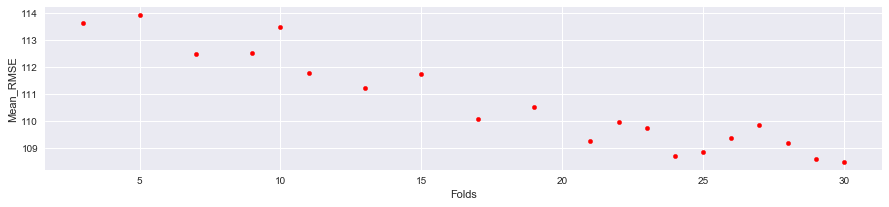

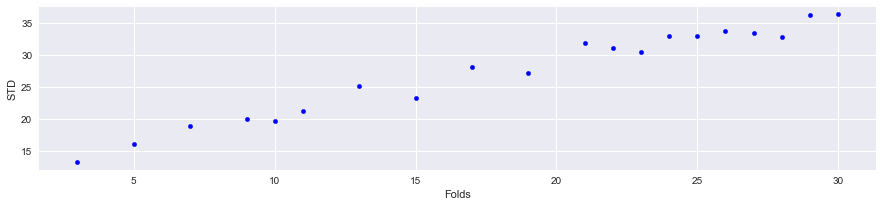

In [676]:
ax1=av_std_merged_2.plot.scatter(x="Folds", y="Mean_RMSE" , c="red")
ax2=av_std_merged_2.plot.scatter(x="Folds", y="STD" , c="blue")

A number of 25 folds generates the lowest RMSE with 107.167127 Dollar based on a model with all features and a knn = 5, while the standard deviation increases with the number of folds added. The number of folds with the 
lowest standard deviation of 10.5457234754 is 5. 